### **WINDSPEED ANALYSIS:**

The weather data was downloaded from the [Met Eireann](https://www.met.ie/climate/available-data/historical-data) historical data website.  5 locations across Ireland were chosen to represent North, South, East and West to get an overview of weather conditions across Ireland.  




In [1]:
import pandas as pd
import glob
import os

# CSV file path:
folder_path = r'C:\Users\louis\OneDrive\Desktop\PFDA\PFDA_project\weather'

# List of all CSV files in the folder:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# List to store individual DataFrames:
dfs = []

# Loop through each CSV file, add location column, and read the file:
for file in csv_files:
    
    df = pd.read_csv(file, skiprows=23, low_memory=False)
    
   # add location column:
    location = os.path.basename(file).split('.')[0]  # Extract the location name from the file name
    df['location'] = location  # Add this as a new column in the DataFrame
    
    # Append df to the list:
    dfs.append(df)

# Combine all DataFrames in the list into one DataFrame:
combined_df = pd.concat(dfs, ignore_index=True)

# List of the columns to keep:
columns_to_keep = ['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir', 'sun', 'vis', 'clamt', 'location']

# Filter the combined_df to keep only the desired columns:
combined_df = combined_df[columns_to_keep]

# Save the combined_df to a csv file:
# combined_df.to_csv('weather_data.csv', index=False)

# Check data
combined_df


# Reference:
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe



,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location
0,16-sep-1956 15:00,0.0,14.4,12.1,10.0,76,12.4,1026.7,0,0,0.1,16000,5,belmullet
1,16-sep-1956 16:00,0.0,13.9,11.6,9.4,75,11.9,1026.6,0,0,0.1,24000,4,belmullet
2,16-sep-1956 17:00,0.0,14.2,12.0,10.0,76,12.3,1026.4,0,0,0.4,19000,5,belmullet
3,16-sep-1956 18:00,0.0,13.0,11.6,10.0,85,12.6,1026.5,0,0,0.0,30000,4,belmullet
4,16-sep-1956 19:00,0.0,12.6,11.7,11.1,90,13.1,1026.8,0,0,0.0,28000,7,belmullet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307398,31-dec-2024 20:00,1.6,8.9,8.5,8.0,94,10.7,1007.4,9,250,,,,valentia
3307399,31-dec-2024 21:00,3.0,8.6,8.4,8.1,96,10.8,1006.1,4,170,,,,valentia
3307400,31-dec-2024 22:00,2.8,8.2,8.0,7.6,95,10.5,1005.8,7,290,,,,valentia
3307401,31-dec-2024 23:00,2.6,8.0,7.5,6.9,92,9.9,1005.0,7,320,,,,valentia


In [2]:

# Strip leading/trailing whitespaces.
combined_df.columns = combined_df.columns.str.strip() 
# Remove special characters.
combined_df.columns = combined_df.columns.str.replace(r'\.?\d+$', '', regex=True)  # Removes .1, .2, etc.
# Check df.
print(combined_df.head())


                date rain  temp  wetb dewpt rhum vappr     msl wdsp wddir  \
0  16-sep-1956 15:00  0.0  14.4  12.1  10.0   76  12.4  1026.7    0     0   
1  16-sep-1956 16:00  0.0  13.9  11.6   9.4   75  11.9  1026.6    0     0   
2  16-sep-1956 17:00  0.0  14.2  12.0  10.0   76  12.3  1026.4    0     0   
3  16-sep-1956 18:00  0.0  13.0  11.6  10.0   85  12.6  1026.5    0     0   
4  16-sep-1956 19:00  0.0  12.6  11.7  11.1   90  13.1  1026.8    0     0   

   sun    vis clamt   location  
0  0.1  16000     5  belmullet  
1  0.1  24000     4  belmullet  
2  0.4  19000     5  belmullet  
3  0.0  30000     4  belmullet  
4  0.0  28000     7  belmullet  


In [3]:

combined_df.columns = combined_df.columns.str.replace(r'123$', '', regex=True) 

print(combined_df)

                      date rain  temp  wetb dewpt rhum vappr     msl wdsp  \
0        16-sep-1956 15:00  0.0  14.4  12.1  10.0   76  12.4  1026.7    0   
1        16-sep-1956 16:00  0.0  13.9  11.6   9.4   75  11.9  1026.6    0   
2        16-sep-1956 17:00  0.0  14.2  12.0  10.0   76  12.3  1026.4    0   
3        16-sep-1956 18:00  0.0  13.0  11.6  10.0   85  12.6  1026.5    0   
4        16-sep-1956 19:00  0.0  12.6  11.7  11.1   90  13.1  1026.8    0   
...                    ...  ...   ...   ...   ...  ...   ...     ...  ...   
3307398  31-dec-2024 20:00  1.6   8.9   8.5   8.0   94  10.7  1007.4    9   
3307399  31-dec-2024 21:00  3.0   8.6   8.4   8.1   96  10.8  1006.1    4   
3307400  31-dec-2024 22:00  2.8   8.2   8.0   7.6   95  10.5  1005.8    7   
3307401  31-dec-2024 23:00  2.6   8.0   7.5   6.9   92   9.9  1005.0    7   
3307402  01-jan-2025 00:00  2.0   7.7   7.1   6.4   91   9.6  1004.9    8   

        wddir  sun    vis clamt   location  
0           0  0.1  16000     

In [4]:
# print location names
print(combined_df.location.unique())


['belmullet' 'dublinairport' 'malinhead' 'shannonairport' 'valentia']


In [5]:
# check columns
combined_df.columns

Index(['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp',
       'wddir', 'sun', 'vis', 'clamt', 'location'],
      dtype='object')

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307403 entries, 0 to 3307402
Data columns (total 14 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date      object
 1   rain      object
 2   temp      object
 3   wetb      object
 4   dewpt     object
 5   rhum      object
 6   vappr     object
 7   msl       object
 8   wdsp      object
 9   wddir     object
 10  sun       object
 11  vis       object
 12  clamt     object
 13  location  object
dtypes: object(14)
memory usage: 353.3+ MB


In [7]:
# change date to index
combined_df.set_index('date', inplace=True)

combined_df

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location
date,,,,,,,,,,,,,
16-sep-1956 15:00,0.0,14.4,12.1,10.0,76,12.4,1026.7,0,0,0.1,16000,5,belmullet
16-sep-1956 16:00,0.0,13.9,11.6,9.4,75,11.9,1026.6,0,0,0.1,24000,4,belmullet
16-sep-1956 17:00,0.0,14.2,12.0,10.0,76,12.3,1026.4,0,0,0.4,19000,5,belmullet
16-sep-1956 18:00,0.0,13.0,11.6,10.0,85,12.6,1026.5,0,0,0.0,30000,4,belmullet
16-sep-1956 19:00,0.0,12.6,11.7,11.1,90,13.1,1026.8,0,0,0.0,28000,7,belmullet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-dec-2024 20:00,1.6,8.9,8.5,8.0,94,10.7,1007.4,9,250,,,,valentia
31-dec-2024 21:00,3.0,8.6,8.4,8.1,96,10.8,1006.1,4,170,,,,valentia
31-dec-2024 22:00,2.8,8.2,8.0,7.6,95,10.5,1005.8,7,290,,,,valentia


In [8]:
# convert date to datetime
combined_df.index = pd.to_datetime(combined_df.index, errors='coerce')

# check the index
print(combined_df.index.dtype)  


C:\Users\louis\AppData\Local\Temp\ipykernel_6848\1178169601.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df.index = pd.to_datetime(combined_df.index, errors='coerce')


datetime64[ns]


In [9]:
# change wdsp, temp, wetb, rain, rhum to numeric
combined_df['wdsp'] = pd.to_numeric(combined_df['wdsp'], errors='coerce')
combined_df['temp'] = pd.to_numeric(combined_df['temp'], errors='coerce')


# check data types
combined_df.dtypes

rain         object
temp        float64
wetb         object
dewpt        object
rhum         object
vappr        object
msl          object
wdsp        float64
wddir        object
sun          object
vis          object
clamt        object
location     object
dtype: object

In [10]:
# check for missing values
combined_df.isnull().sum()

rain          0
temp         60
wetb          0
dewpt         0
rhum          0
vappr         0
msl           0
wdsp        110
wddir         0
sun           0
vis           0
clamt         0
location      0
dtype: int64

In [11]:
# remove missing values
combined_df.dropna(inplace=True)

# check for missing values
combined_df.isnull().sum()

rain        0
temp        0
wetb        0
dewpt       0
rhum        0
vappr       0
msl         0
wdsp        0
wddir       0
sun         0
vis         0
clamt       0
location    0
dtype: int64

In [12]:

pd.set_option('display.float_format', '{:.2f}'.format)  

# Group the data by 'location'
grouped = combined_df.groupby('location')

# Get summary statistics for each group (location)
location_stats = grouped[['wdsp', 'temp']].describe()

# Display the summary statistics
location_stats

wdsp                                             temp  \
                   count  mean  std  min  25%   50%   75%   max     count   
location                                                                    
belmullet      598641.00 12.71 6.99 0.00 8.00 12.00 17.00 63.00 598641.00   
dublinairport  701281.00 10.13 5.69 0.00 6.00  9.00 14.00 46.00 701281.00   
malinhead      610700.00 15.22 7.83 0.00 9.00 14.00 20.00 63.00 610700.00   
shannonairport 695436.00  9.59 5.62 0.00 6.00  9.00 13.00 60.00 695436.00   
valentia       701176.00 10.11 6.11 0.00 6.00 10.00 14.00 58.00 701176.00   

                                                         
                mean  std    min  25%   50%   75%   max  
location                                                 
belmullet      10.20 4.04  -7.30 7.50 10.30 13.20 28.20  
dublinairport   9.65 4.89 -11.50 6.10  9.70 13.20 29.10  
malinhead       9.76 3.90  -6.00 6.90  9.80 12.70 26.60  
shannonairport 10.39 4.87 -11.30 7.10 10.50 13.80 31.50  
valentia       10.93 3.97  -7.70 8.40 11.00 13.80 29.00

### **Data Visualisation:**

##### Windspeed:

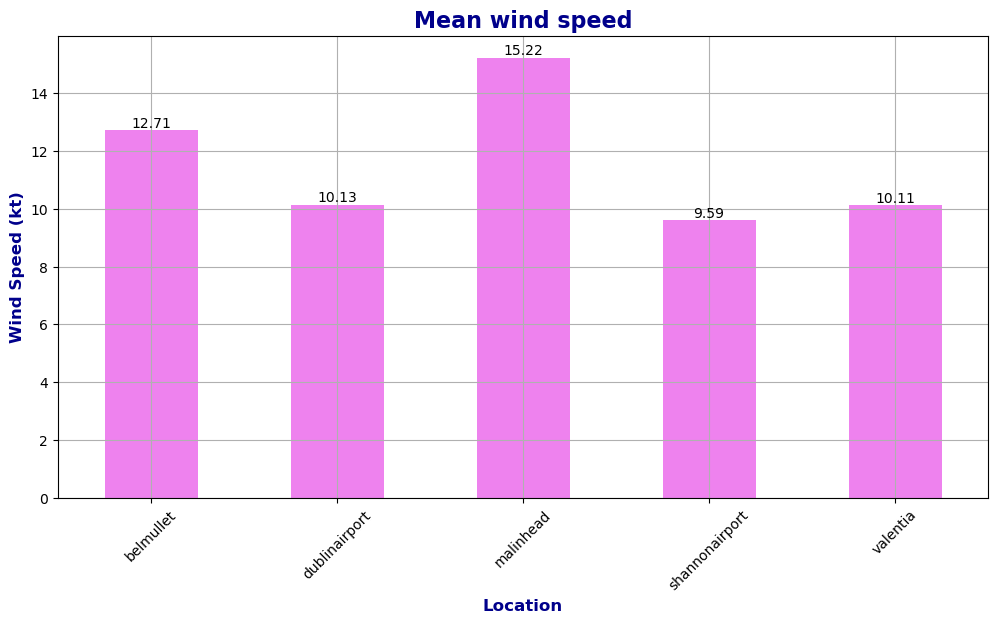

In [13]:
# bar plot of mean wind speed at each location
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
grouped['wdsp'].mean().plot(kind='bar', color='violet')
plt.title('Mean wind speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Location', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.grid()

# Add annotations to the plot
for i, mean_wdsp in enumerate(grouped['wdsp'].mean()):
    plt.text(i, mean_wdsp, round(mean_wdsp, 2), ha='center', va='bottom')

#plt.savefig('mean_wind_speed.png')
plt.show()

In [14]:
# wdsp data
wdsp_data = combined_df['wdsp'] # Extract the wdsp column

# resample data to monthly frequency
wdsp_monthly = wdsp_data.resample('ME').mean()

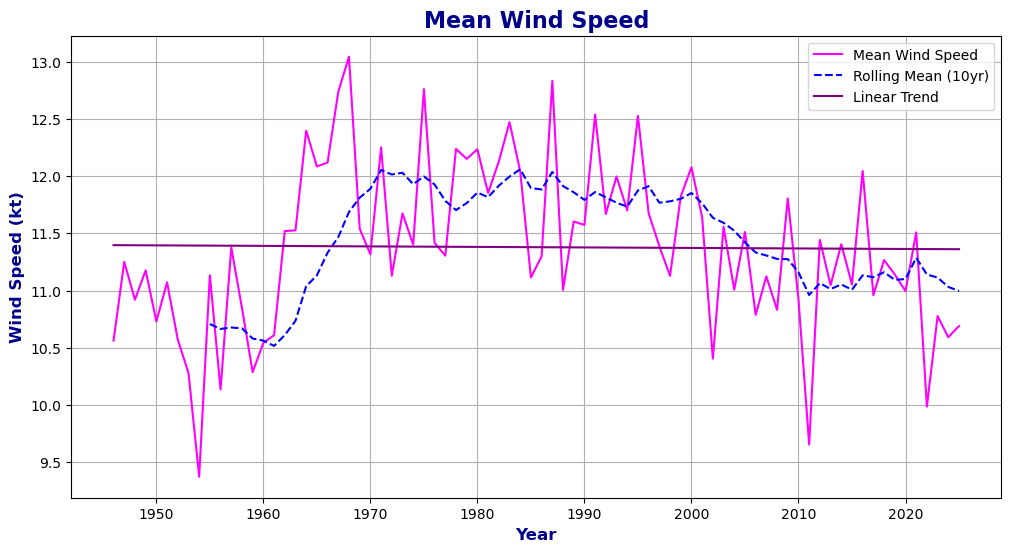

Slope of the linear trend line: -0.0004500239031567905
The wind speed is decreasing over time.


In [15]:
# plot wind speed vs time

import numpy as np
import matplotlib.pyplot as plt

# remove the last row of the data
wdsp_data = combined_df['wdsp'].drop(combined_df.index[-1])

# Resample the data to yearly:
wdsp_yearly = wdsp_data.resample('YE').mean()

# Calculate the rolling mean: 10yr
rolling_mean = wdsp_yearly.rolling(window=10).mean() 

# Create a linear trend line using numpy polyfit
years = np.arange(len(wdsp_yearly))  
coefficients = np.polyfit(years, wdsp_yearly.values, 1)  # Fit a line 
linear_trend = np.polyval(coefficients, years) 

# Plot the yearly wind speed data
plt.figure(figsize=(12, 6))
plt.plot(wdsp_yearly, color='magenta', label='Mean Wind Speed')
plt.plot(rolling_mean, color='blue', linestyle='--', label='Rolling Mean (10yr)')
plt.plot(wdsp_yearly.index, linear_trend, color='purple', linestyle='-', label='Linear Trend')
plt.title('Mean Wind Speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True)
plt.legend()
#plt.savefig('mean_yearly_windspeed_with_trends.png')
plt.show()


# Calculate the slope of the linear trend line
slope, intercept = coefficients  # Extract the slope and intercept from the coefficients
print('Slope of the linear trend line:', slope)

if slope > 0:
    print('The wind speed is increasing over time.')
elif slope < 0:
    print('The wind speed is decreasing over time.')
else:
    print('The wind speed is constant over time.')

##### Temperature:

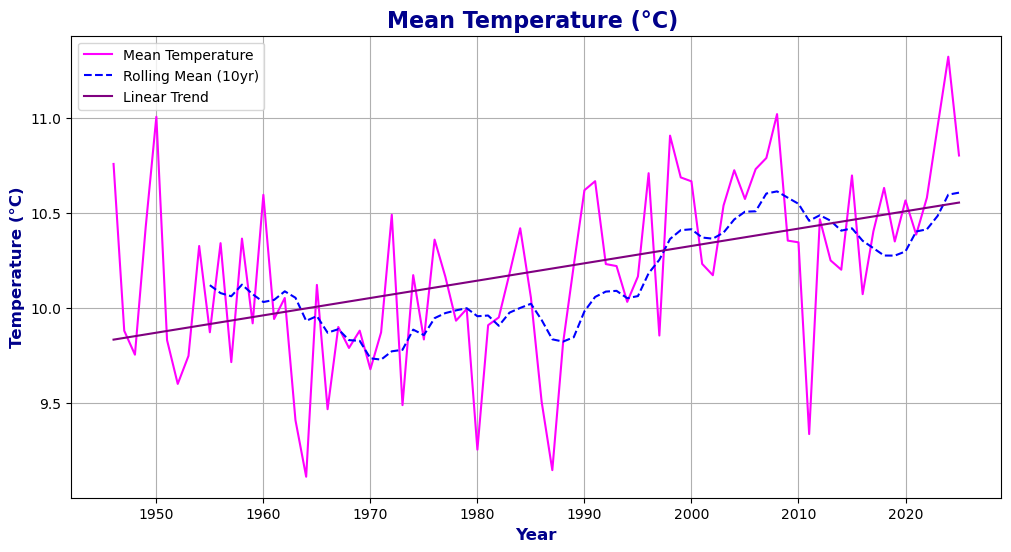

Slope of the linear trend line: 0.00910987419356476
The temperature is increasing over time.


In [16]:
# plot temperature vs time:

import numpy as np
import matplotlib.pyplot as plt

# remove the last row of the data
temp_data = combined_df['temp'].drop(combined_df.index[-1])

# Resample the data to yearly mean
temp_yearly = temp_data.resample('YE').mean()

# Calculate the rolling mean:
rolling_trend_temp = temp_yearly.rolling(window=10).mean() 

# Linear trend line using numpy polyfit. 
years = np.arange(len(temp_yearly))  
coefficients_temp = np.polyfit(years, temp_yearly.values, 1)  # Fit a line 
linear_trend_temp = np.polyval(coefficients_temp, years)  # Calculate the trend values

# Plot the yearly temperature data
plt.figure(figsize=(12, 6))
plt.plot(temp_yearly, color='magenta', label='Mean Temperature')
plt.plot(rolling_trend_temp, color='blue', linestyle='--', label='Rolling Mean (10yr)')
plt.plot(temp_yearly.index, linear_trend_temp, color='purple', linestyle='-', label='Linear Trend')
plt.title('Mean Temperature (°C) ', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True)
plt.legend()
#plt.savefig('mean_yearly_temperature_with_trends.png')
plt.show()

# Calculate the slope of the linear trend line
slope_temp, intercept_temp = coefficients_temp  # Extract the slope and intercept from the coefficients
print('Slope of the linear trend line:', slope_temp)

if slope_temp > 0:
    print('The temperature is increasing over time.')
elif slope_temp < 0:
    print('The temperature is decreasing over time.')
else:
    print('The temperature is constant over time.')


##### Linear Regression for prediction:

In [17]:
# Linear Regression Model for Temperature Prediction 
import numpy as np
from sklearn.linear_model import LinearRegression

# Extract the year from the date index 
combined_df['year'] = combined_df.index.year 

# Extract the years and corresponding temperatures
X = combined_df['year'].values.reshape(-1, 1)  # Years (input feature)
y = combined_df['temp'].values  # Target variable

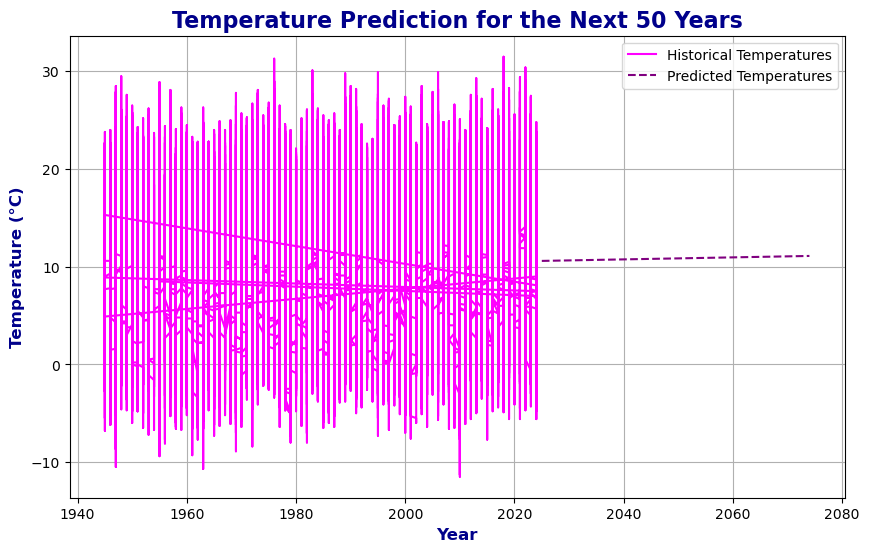

In [18]:

# Drop the last row using .drop()
combined_df = combined_df.drop(combined_df.index[-1])

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predicting for the next 50 years (2025 to 2075)
future_years = np.arange(2025, 2075).reshape(-1, 1)
future_temps = model.predict(future_years)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['temp'], label='Historical Temperatures', color='magenta')
plt.plot(future_years, future_temps, label='Predicted Temperatures', color='purple', linestyle='--')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='darkblue')
plt.title('Temperature Prediction for the Next 50 Years', fontsize=16, fontweight='bold', color='darkblue')
plt.legend()
plt.grid(True)
plt.show()



In [19]:

# Get the last known temperature from the dataset
last_known_temp = combined_df['temp'].iloc[-1]

# Get the predicted temperature for the last year 2075
predicted_last_year_temp = future_temps[-1]

# Calculate the predicted temperature increase
temp_increase = predicted_last_year_temp - last_known_temp

print(f'Predicted temperature increase by 2075: {temp_increase:.2f} °C')


Predicted temperature increase by 2075: 3.10 °C


In [20]:
# Linear Regression Model for Windspeed Prediction
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract the year from the date index
combined_df['year'] = combined_df.index.year  

# Extract the years and corresponding temperatures
X = combined_df['year'].values.reshape(-1, 1)  
y = combined_df['wdsp'].values  

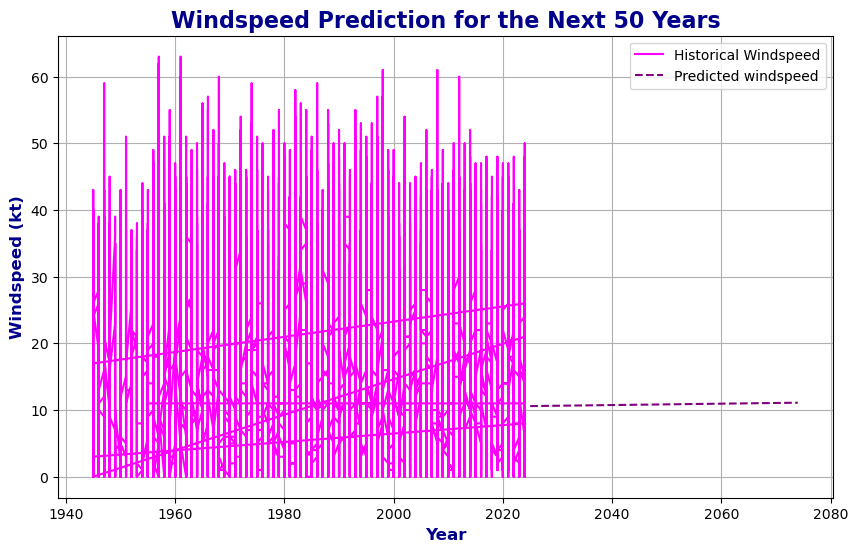

Predicted windspeed increase by 2075: 4.11 kt


In [21]:

# Drop the last row using .drop()
combined_df = combined_df.drop(combined_df.index[-1])

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predicting for the next 50 years (2025 to 2075)
future_years = np.arange(2025, 2075).reshape(-1, 1)
future_wdsps = model.predict(future_years) 

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['wdsp'], label='Historical Windspeed', color='magenta')
plt.plot(future_years, future_temps, label='Predicted windspeed', color='purple', linestyle='--')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Windspeed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.title('Windspeed Prediction for the Next 50 Years', fontsize=16, fontweight='bold', color='darkblue')
plt.legend()
plt.grid(True)
plt.show()

last_known_wdsp = combined_df['wdsp'].iloc[-1]
predicted_last_year_wdsp = future_wdsps[-1]

# Calculate the predicted temperature increase
wdsp_increase = predicted_last_year_wdsp - last_known_wdsp

print(f'Predicted windspeed increase by 2075: {wdsp_increase:.2f} kt')



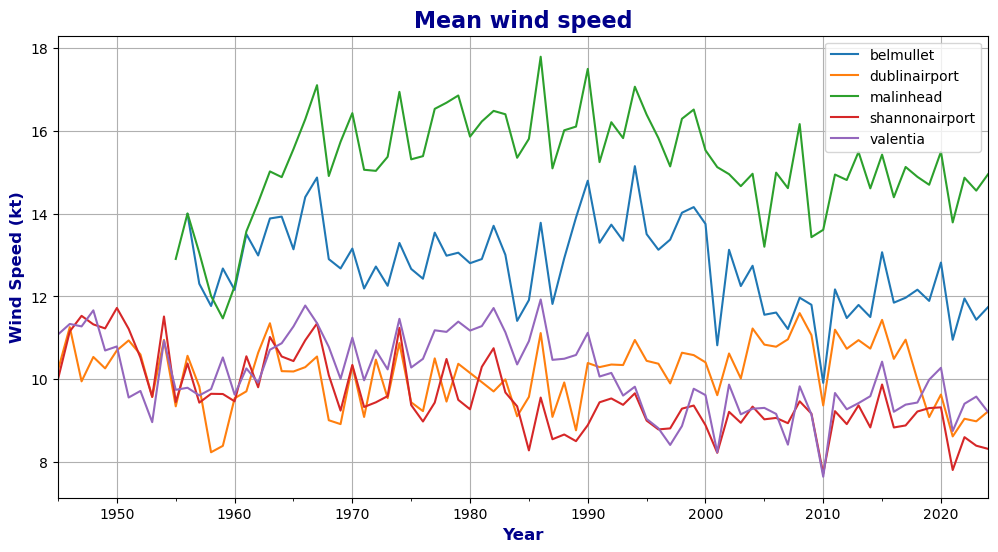

In [22]:
# plot mean wdsp per location:
import matplotlib.pyplot as plt

# group data by location. 
grouped = combined_df.groupby('location')

# plot mean data wdsp at all locations
plt.figure(figsize=(12, 6))
for location, data in grouped:
    data['wdsp'].resample('YE').mean().plot(label=location)

plt.title('Mean wind speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('mean_wind_speed.png')
plt.show()

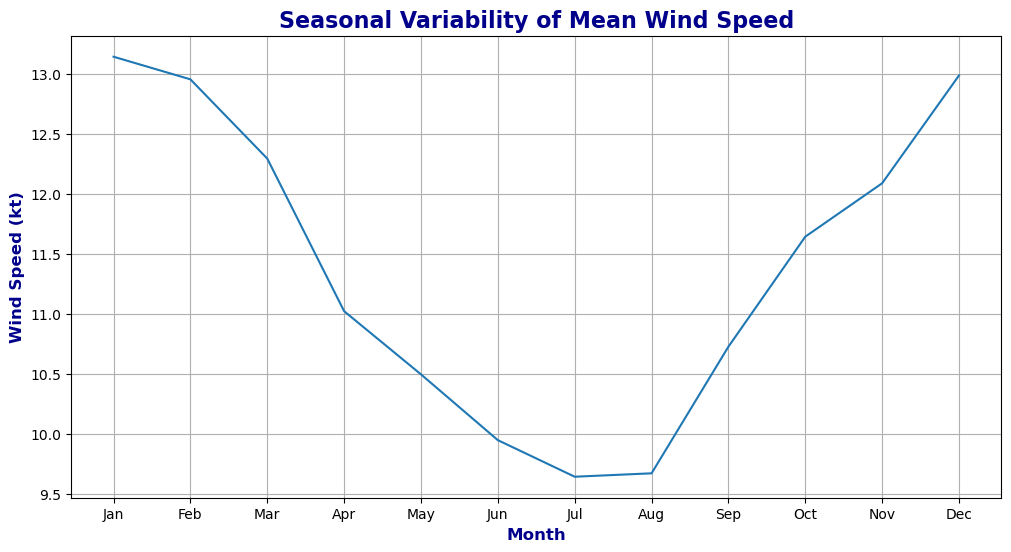

In [23]:
import matplotlib.pyplot as plt

# Resample data to monthly frequency
wdsp_monthly = wdsp_data.resample('ME').mean()

# Plot the monthly mean wind speed
plt.figure(figsize=(12, 6))
wdsp_monthly.groupby(wdsp_monthly.index.month).mean().plot()
plt.title('Seasonal Variability of Mean Wind Speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
#plt.savefig('seasonal_variability_windspeed.png')
plt.show()

In [24]:
import pandas as pd
import numpy as np


# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Extract the month from the index and apply the season function
combined_df['season'] = combined_df.index.month.map(get_season)

# Check the first few rows to see if the 'season' column was added correctly
combined_df['season']



date
1956-09-16 15:00:00    Autumn
1956-09-16 16:00:00    Autumn
1956-09-16 17:00:00    Autumn
1956-09-16 18:00:00    Autumn
1956-09-16 19:00:00    Autumn
                        ...  
2024-12-31 18:00:00    Winter
2024-12-31 19:00:00    Winter
2024-12-31 20:00:00    Winter
2024-12-31 21:00:00    Winter
2024-12-31 22:00:00    Winter
Name: season, Length: 3307224, dtype: object

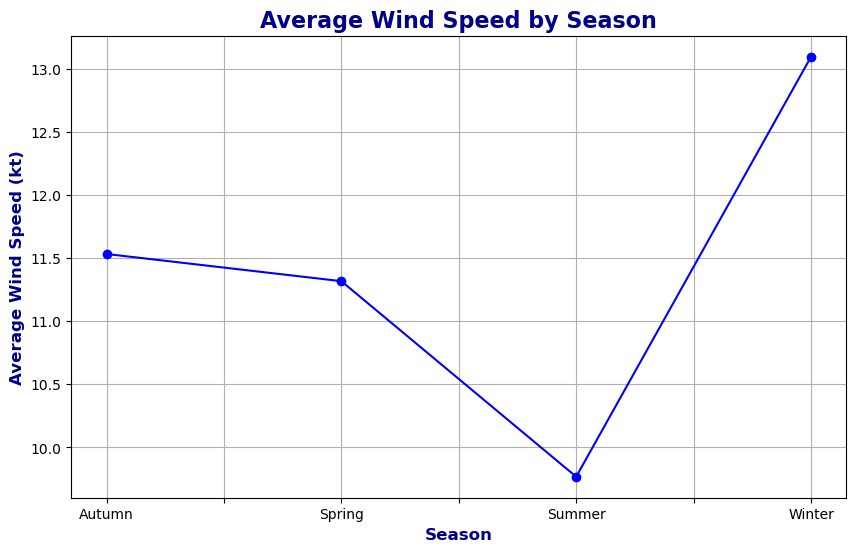

In [25]:
import matplotlib.pyplot as plt

# Plotting average wind speed by season
season_avg = combined_df.groupby('season')['wdsp'].mean()

# Create a line plot of average wind speed by season
plt.figure(figsize=(10, 6))
season_avg.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Wind Speed by Season', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Season', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Average Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True)
#plt.savefig('average_wind_speed_season.png')
plt.show()


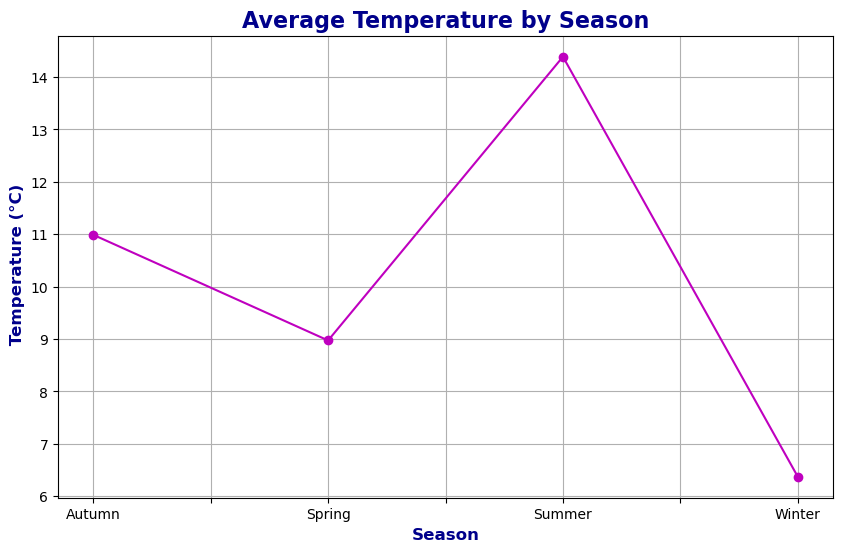

In [26]:
import matplotlib.pyplot as plt

# Plotting average temp by season
season_avg = combined_df.groupby('season')['temp'].mean()

# Create a line plot of average wind speed by season
plt.figure(figsize=(10, 6))
season_avg.plot(kind='line', marker='o', linestyle='-', color='m')
plt.title('Average Temperature by Season', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Season', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel(' Temperature (°C)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True)
#plt.savefig('average_temp_season.png')
plt.show()

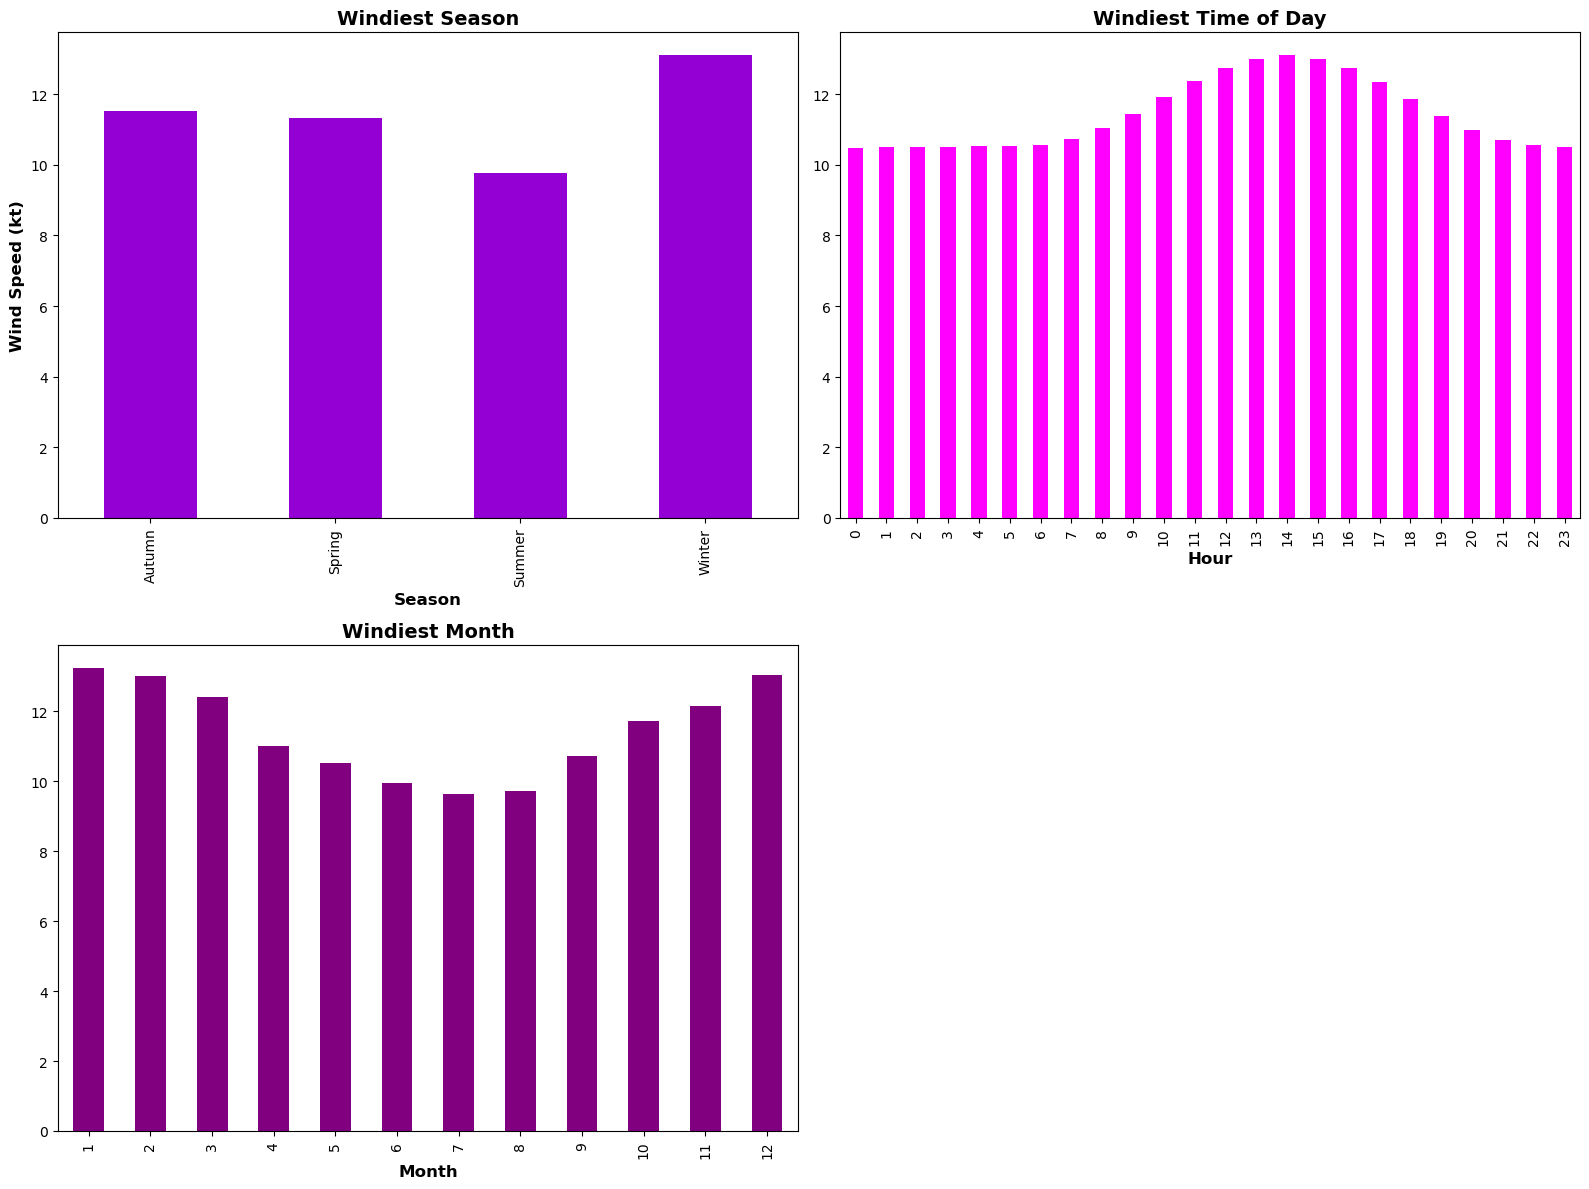

In [27]:
# subplots windiest season, time of day, month. 
import matplotlib.pyplot as plt

# Windiest season
windiest_season = combined_df.groupby('season')['wdsp'].mean()
# Windiest time of day
windiest_time = combined_df.groupby(combined_df.index.hour)['wdsp'].mean()
# Windiest month each year
windiest_month = combined_df.groupby(combined_df.index.month)['wdsp'].mean()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot windiest season
windiest_season.plot(kind='bar', ax=axes[0, 0], color='darkviolet')
axes[0, 0].set_title('Windiest Season', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Season', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold')
# Plot windiest time of day
windiest_time.plot(kind='bar', ax=axes[0, 1], color='magenta')
axes[0, 1].set_title('Windiest Time of Day', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Hour', fontsize=12, fontweight='bold')

# Plot windiest month
windiest_month.plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Windiest Month', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month', fontsize=12, fontweight='bold')

# Remove the empty subplot
fig.delaxes(axes[1, 1]) 

plt.tight_layout()
#plt.savefig('windiest_season_time_month.png')
plt.show()



***
### **End**

In [28]:
# References:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# https://www.statology.org/rolling-mean-pandas/
# https://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime
# https://www.geeksforgeeks.org/matplotlib-figure-figure-delaxes-in-python/
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

